# Training

Train network with own training data (example data from smooth pursuit task in folder 'data/smooth_pursuit').


For training, 4 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - ground truth labels for saccades (encoded as 1). Additional labels are optional (e.g. post-saccadic oscillation, encoded as 2 etc.)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing)
    - lr: learning rate, default: 0.0005
    - weights_name: filename for storage of trained weights. All trained weights will automatically be safed in the local folder 'training'. The default filename is 'weights'
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
  
Call the model with **ueye.DNN()** and then run training with the method **model.train()**

In [1]:
### Parameters ###
datapath = 'data/smooth_pursuit/'
min_sacc_dur = 10 #minimum saccade duration in ms
sampfreq = 1000
weights_name = 'smooth_pursuit'

In [2]:
import numpy as np
import ueye
import scipy.io as io

# load .mat example data
Xtrain,Ytrain,Ltrain = io.loadmat(datapath+'X_train.mat')['X'],io.loadmat(datapath+'Y_train.mat')['Y'],io.loadmat(datapath+'Sacc_train.mat')['Sacc']

# fit model on training data
# weights will automatically be saved to local folder 'training'
model = ueye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur)
model.train(Xtrain,Ytrain,Ltrain)

Early stopping at epoch 500 because overfitting was detected on validation set
Model parameters saved to ./training/smooth_pursuit
Optimal decision threshold for saccade prediction with trained weights: 0.55


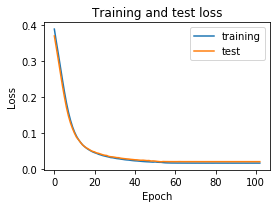

In [3]:
#plot loss
import matplotlib.pyplot as plt
f = plt.figure(figsize=(4,3))

plt.plot(model.loss_train,label='training')
plt.plot(model.loss_val,label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.tight_layout()

### Test after training network
Test performance with separate test data (example data from smooth pursuit task in folder 'data/smooth_pursuit').


For testing, 4 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - ground truth labels for saccades (encoded as 1). Additional labels are optional (e.g. post-saccadic oscillation, encoded as 2 etc.)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - threshold: probability threshold for prediction of saccades (only if 2 classes present in the data). The threshold is validated during training (see output above). Default: 0.5
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing)
    - weights_name: filename of stored trained weights in the folder 'training'. If the model was called and trained before (as in this example), specifying weights_name is not necessary as the trained network will be used.
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
  
Call the model with **ueye.DNN()** and then run training with the method **model.test()**

Or directly apply **model.test()** to the trained model.

Binary Cohens Kappa:  0.975
AUROC: 0.982
F1: 0.99


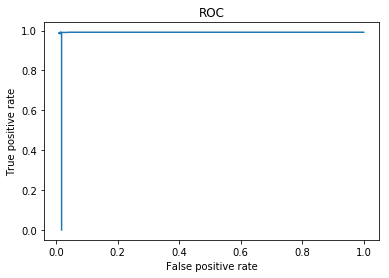

In [6]:
# load example test data
Xtest,Ytest,Ltest = io.loadmat(datapath+'X_test.mat')['X'],io.loadmat(datapath+'Y_test.mat')['Y'],io.loadmat(datapath+'Sacc_test.mat')['Sacc']

# test performance on subset of testset
Prediction,Probability,Performance = model.test(Xtest,Ytest,Ltest)

plt.plot(Performance['fpr'],Performance['tpr'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')

plt.show()

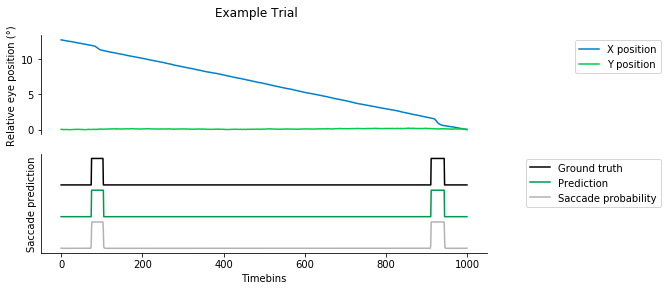

In [10]:
# plot example
i = np.random.randint(Xtest.shape[0])
fig = plt.figure(figsize=(8,4))
plt.suptitle('Example Trial')
ax = fig.add_subplot(211)
x_trace = Xtest[i,:] - np.min(Xtest[i,:])
y_trace = Ytest[i,:] - np.min(Ytest[i,:])
plt.plot(x_trace,label='X position',c=[0,0.5,0.8])
plt.plot(y_trace,label='Y position',c=[0,0.8,0.3])
plt.xticks(())
plt.ylabel('Relative eye position (°)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(bbox_to_anchor=(1.4,1))

# prediction
ax = fig.add_subplot(212)
plt.plot(Ltest[i,:]+2.4,label='Ground truth',c='k')
plt.plot(Prediction[i,:]+1.2,label='Prediction',c=[0,0.6,0.3])
plt.plot(Probability[i,:],label='Saccade probability',c='k',alpha=.3)
plt.yticks(())
plt.ylabel('Saccade prediction')
plt.xlabel('Timebins')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

# Saccade prediction with pretrained network
Predict eye-movements in data (example data from smooth pursuit task in folder 'data/smooth_pursuit').


For prediction, 3 inputs are **necessary**:
    - horizontal eye position (in deg)
    - vertical eye position (in deg)
    - sampling frequency of the eye tracker
    
**Optional** input arguments are:
    - weights_name: filename of stored trained weights in the folder 'training'. Default: 'weights'.
    - threshold: probability threshold for prediction of saccades (only if 2 classes present in the data). The threshold is validated during training (see output above). Default: 0.5
    - min_sacc_dur: minimum saccade duration (in ms) for removal of small saccades (post-processing)
    - classes: the number of classes to be classified. Default is 2 (fixation and saccade)
  
Call the model with **ueye.DNN()** and then run training with the method **model.predict()**

In [11]:
### Parameters ###
sampfreq = 1000
weights_name = 'smooth_pursuit'
min_sacc_dur = 10

# load data
datapath = 'data/smooth_pursuit/' #example data
Xtest,Ytest,Ltest = io.loadmat(datapath+'X_test.mat')['X'],io.loadmat(datapath+'Y_test.mat')['Y'],io.loadmat(datapath+'Sacc_test.mat')['Sacc']

In [12]:
# Prediction
model = ueye.DNN(weights_name=weights_name,
                 sampfreq=sampfreq,
                 min_sacc_dur=min_sacc_dur)
Prediction,Probability = model.predict(Xtest,Ytest)

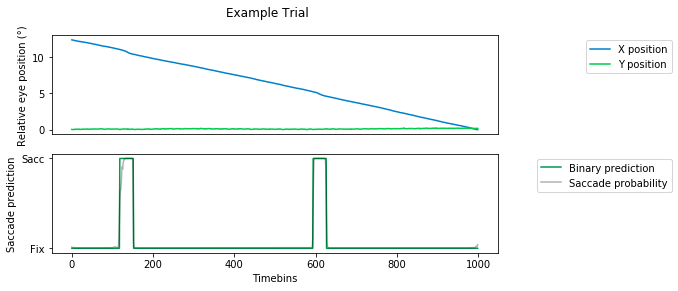

In [13]:
# plot example
i = np.random.randint(Xtest.shape[0])
fig = plt.figure(figsize=(8,4))
plt.suptitle('Example Trial')
ax = fig.add_subplot(211)
x_trace = Xtest[i,:] - np.min(Xtest[i,:])
y_trace = Ytest[i,:] - np.min(Ytest[i,:])
plt.plot(x_trace,label='X position',c=[0,0.5,0.8])
plt.plot(y_trace,label='Y position',c=[0,0.8,0.3])
plt.xticks(())
plt.ylabel('Relative eye position (°)')
plt.legend(bbox_to_anchor=(1.4,1))

# prediction
ax = fig.add_subplot(212)
plt.plot(Prediction[i,:],label='Binary prediction',c=[0,0.6,0.3])
plt.plot(Probability[i,:],label='Saccade probability',c='k',alpha=.3)
plt.yticks((0,1),['Fix','Sacc'])
plt.ylabel('Saccade prediction')
plt.xlabel('Timebins')
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()